# Programming in Data Analytics

## Uwurukundo Nadine

Importing the following library to be used for this project

In [1]:
import pandas as pd
import numpy as np
import requests
import schedule
import ast
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### TASK 1
#Task was about calling the information from the JCDEAUX WEBSITE
#This was done by creating function along with schedule python module wwhich were used to collect data from the JCDEAUX websites in different time periods to have a comprehensive dataset that can generate more information needed for this analysis.

In [78]:
## Data collection has been done in two steps
# one round of data collection has been done and the data have saved into csv

import pandas as pd
import requests
import schedule
import time

url = 'https://api.jcdecaux.com/vls/v3/stations?'
key = 'fb7e48b0e05a43f1b35c0361f2de955f4011612d'
contract = 'dublin'
bikes = url + 'contract=' + contract + '&apiKey=' + key
response = requests.get(bikes)
data = response.json()
df = pd.DataFrame(data)
df.sort_values('lastUpdate', ascending = True)

#The bottom code is to save the work above into a csv file, for the purpose of not overwriting, we turn it into a comment

#df.to_csv('data.csv',index=False)



In [ ]:
import pandas as pd
import numpy as np
import requests
import schedule
import time

#Creating a function to rerun the fetching data for Dublin bikes API
# The csv that have been already fetched was called and the new information have been appended on it
def fetch_here():
        file = pd.read_csv('data.csv')
        url = 'https://api.jcdecaux.com/vls/v3/stations?'
        key = 'fb7e48b0e05a43f1b35c0361f2de955f4011612d'
        contract = 'dublin'
        bikes = url + 'contract=' + contract + '&apiKey=' + key
        response = requests.get(bikes).json()
        df1 = pd.DataFrame(response)
        df1.sort_values('lastUpdate', ascending = True)
        result = pd.concat([file,df1])
        result.to_csv('data.csv',index=False)
       
    #Time scheduled for the calling is set to after every 10 minutes
schedule.every(10).minutes.do(fetch_here)

while True:
    schedule.run_pending()
    time.sleep(1)


### TASK 2
Here below are the project plans that need to be implemeneted at the end of the project
0.Preprocessing steps which include reading data, data cleaning and features engineering to get a readily dataset that can be used.Furthermore, only useful variables needed for the analysis need to be kept.
1.Summary statistics of the variables chosen for analysis
2.Difference in bike categories availability across different time slots and regions 
3.Stations capacity and bike usages
4.Identifying bike usages by stations
5.Identifying the peak time and bottom time in bike usages
6.How is the availability of payment system by stations
7.Conclusion


# Reading data in python and making some preprocessing tasks

In [2]:
#Reading the data set into a variable called DublinBikesOriginal
DublinBikesOriginal = pd.read_csv('data.csv')
DublinBikesOriginal


,number,contractName,name,address,position,banking,bonus,status,lastUpdate,connected,overflow,shape,totalStands,mainStands,overflowStands
0,42,dublin,SMITHFIELD NORTH,Smithfield North,"{'latitude': 53.349562, 'longitude': -6.278198}",False,False,OPEN,2022-12-04T21:28:49Z,True,False,NaN,"{'availabilities': {'bikes': 12, 'stands': 18,...","{'availabilities': {'bikes': 12, 'stands': 18,...",NaN
1,30,dublin,PARNELL SQUARE NORTH,Parnell Square North,"{'latitude': 53.3537415547453, 'longitude': -6...",False,False,OPEN,2022-12-04T21:30:53Z,True,False,NaN,"{'availabilities': {'bikes': 1, 'stands': 19, ...","{'availabilities': {'bikes': 1, 'stands': 19, ...",NaN
2,54,dublin,CLONMEL STREET,Clonmel Street,"{'latitude': 53.336021, 'longitude': -6.26298}",False,False,OPEN,2022-12-04T21:34:33Z,True,False,NaN,"{'availabilities': {'bikes': 14, 'stands': 19,...","{'availabilities': {'bikes': 14, 'stands': 19,...",NaN
3,108,dublin,AVONDALE ROAD,Avondale Road,"{'latitude': 53.359405, 'longitude': -6.276142}",False,False,OPEN,2022-12-04T21:34:49Z,True,False,NaN,"{'availabilities': {'bikes': 20, 'stands': 15,...","{'availabilities': {'bikes': 20, 'stands': 15,...",NaN
4,20,dublin,JAMES STREET EAST,James Street East,"{'latitude': 53.336597, 'longitude': -6.248109}",False,False,OPEN,2022-12-04T21:36:59Z,True,False,NaN,"{'availabilities': {'bikes': 5, 'stands': 25, ...","{'availabilities': {'bikes': 5, 'stands': 25, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242106,39,dublin,WILTON TERRACE,Wilton Terrace,"{'latitude': 53.332383, 'longitude': -6.252717}",False,False,OPEN,2022-12-17T16:53:31Z,True,False,NaN,"{'availabilities': {'bikes': 4, 'stands': 16, ...","{'availabilities': {'bikes': 4, 'stands': 16, ...",NaN
242107,83,dublin,EMMET ROAD,Emmet Road,"{'latitude': 53.340714, 'longitude': -6.308191}",False,False,OPEN,2022-12-17T16:49:55Z,True,False,NaN,"{'availabilities': {'bikes': 25, 'stands': 15,...","{'availabilities': {'bikes': 25, 'stands': 15,...",NaN
242108,92,dublin,HEUSTON BRIDGE (NORTH),Heuston Bridge (North),"{'latitude': 53.347802, 'longitude': -6.292432}",False,False,OPEN,2022-12-17T16:48:19Z,True,False,NaN,"{'availabilities': {'bikes': 27, 'stands': 13,...","{'availabilities': {'bikes': 27, 'stands': 13,...",NaN
242109,21,dublin,LEINSTER STREET SOUTH,Leinster Street South,"{'latitude': 53.34218, 'longitude': -6.254485}",False,False,OPEN,2022-12-17T16:48:16Z,True,False,NaN,"{'availabilities': {'bikes': 3, 'stands': 27, ...","{'availabilities': {'bikes': 3, 'stands': 27, ...",NaN


In [3]:
#Removing the duplicates in the dataset
DublinBikes = pd.read_csv('data.csv')
DublinBikes.drop_duplicates(keep='first',inplace=True)
DublinBikes.to_csv('DataDupDropped.csv',index=False)
DublinBikes

,number,contractName,name,address,position,banking,bonus,status,lastUpdate,connected,overflow,shape,totalStands,mainStands,overflowStands
0,42,dublin,SMITHFIELD NORTH,Smithfield North,"{'latitude': 53.349562, 'longitude': -6.278198}",False,False,OPEN,2022-12-04T21:28:49Z,True,False,NaN,"{'availabilities': {'bikes': 12, 'stands': 18,...","{'availabilities': {'bikes': 12, 'stands': 18,...",NaN
1,30,dublin,PARNELL SQUARE NORTH,Parnell Square North,"{'latitude': 53.3537415547453, 'longitude': -6...",False,False,OPEN,2022-12-04T21:30:53Z,True,False,NaN,"{'availabilities': {'bikes': 1, 'stands': 19, ...","{'availabilities': {'bikes': 1, 'stands': 19, ...",NaN
2,54,dublin,CLONMEL STREET,Clonmel Street,"{'latitude': 53.336021, 'longitude': -6.26298}",False,False,OPEN,2022-12-04T21:34:33Z,True,False,NaN,"{'availabilities': {'bikes': 14, 'stands': 19,...","{'availabilities': {'bikes': 14, 'stands': 19,...",NaN
3,108,dublin,AVONDALE ROAD,Avondale Road,"{'latitude': 53.359405, 'longitude': -6.276142}",False,False,OPEN,2022-12-04T21:34:49Z,True,False,NaN,"{'availabilities': {'bikes': 20, 'stands': 15,...","{'availabilities': {'bikes': 20, 'stands': 15,...",NaN
4,20,dublin,JAMES STREET EAST,James Street East,"{'latitude': 53.336597, 'longitude': -6.248109}",False,False,OPEN,2022-12-04T21:36:59Z,True,False,NaN,"{'availabilities': {'bikes': 5, 'stands': 25, ...","{'availabilities': {'bikes': 5, 'stands': 25, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241975,10,dublin,DAME STREET,Dame Street,"{'latitude': 53.344007, 'longitude': -6.266802}",True,False,OPEN,2022-12-17T16:53:19Z,True,False,NaN,"{'availabilities': {'bikes': 16, 'stands': 0, ...","{'availabilities': {'bikes': 16, 'stands': 0, ...",NaN
241982,33,dublin,PRINCES STREET / O'CONNELL STREET,Princes Street / O'Connell Street,"{'latitude': 53.349013, 'longitude': -6.260311}",True,False,OPEN,2022-12-17T16:53:04Z,True,False,NaN,"{'availabilities': {'bikes': 21, 'stands': 2, ...","{'availabilities': {'bikes': 21, 'stands': 2, ...",NaN
241985,57,dublin,GRATTAN STREET,Grattan Street,"{'latitude': 53.339629, 'longitude': -6.243778}",False,False,OPEN,2022-12-17T16:53:35Z,True,False,NaN,"{'availabilities': {'bikes': 3, 'stands': 20, ...","{'availabilities': {'bikes': 3, 'stands': 20, ...",NaN
241986,80,dublin,ST JAMES HOSPITAL (LUAS),St James Hospital (Luas),"{'latitude': 53.341359, 'longitude': -6.292951}",False,False,OPEN,2022-12-17T16:52:59Z,True,False,NaN,"{'availabilities': {'bikes': 31, 'stands': 9, ...","{'availabilities': {'bikes': 31, 'stands': 9, ...",NaN


In [4]:
#Selecting the variable totalstand for expanding the dict items
df = pd.DataFrame(DublinBikes)
df['totalStands']

0         {'availabilities': {'bikes': 12, 'stands': 18,...
1         {'availabilities': {'bikes': 1, 'stands': 19, ...
2         {'availabilities': {'bikes': 14, 'stands': 19,...
3         {'availabilities': {'bikes': 20, 'stands': 15,...
4         {'availabilities': {'bikes': 5, 'stands': 25, ...
                                ...                        
241975    {'availabilities': {'bikes': 16, 'stands': 0, ...
241982    {'availabilities': {'bikes': 21, 'stands': 2, ...
241985    {'availabilities': {'bikes': 3, 'stands': 20, ...
241986    {'availabilities': {'bikes': 31, 'stands': 9, ...
241993    {'availabilities': {'bikes': 4, 'stands': 16, ...
Name: totalStands, Length: 54749, dtype: object

In [5]:
# In this code, we wanted to evaluate a string that contains a Python dictionary
#As an outcome, the ast.literal_eval method successfully evaluates the string, and gets the Python dictionary object.

import ast
df = pd.DataFrame(DublinBikes)

#Expanding the information on the total stand and using it to generate engineering features
df["totalStands"] =  df["totalStands"].map(lambda d : ast.literal_eval(str(d)))
TotalStand = pd.DataFrame(df["totalStands"].to_dict()).T
TotalStand.head(5)


,availabilities,capacity
0,"{'bikes': 12, 'stands': 18, 'mechanicalBikes':...",30
1,"{'bikes': 1, 'stands': 19, 'mechanicalBikes': ...",20
2,"{'bikes': 14, 'stands': 19, 'mechanicalBikes':...",33
3,"{'bikes': 20, 'stands': 15, 'mechanicalBikes':...",35
4,"{'bikes': 5, 'stands': 25, 'mechanicalBikes': ...",30


In [6]:
# parsing information that are contained into availabilities
Bike_availabilities= pd.DataFrame(TotalStand["availabilities"].to_dict()).T
Bike_availabilities.head(3)

,bikes,stands,mechanicalBikes,electricalBikes,electricalInternalBatteryBikes,electricalRemovableBatteryBikes
0,12,18,6,6,0,6
1,1,19,1,0,0,0
2,14,19,9,5,0,5


In [7]:
#Joining both three DataFrame to have a comprehensive dataframe
Extracted=df.join(TotalStand).join(Bike_availabilities)

#changing the capacity column to integer datatype
Extracted = Extracted.astype({'capacity':'int'})
Extracted = Extracted.astype({'stands':'int'})

#Confirming the expanding was successful
Extracted.head(3)
#len(Extracted)

,number,contractName,name,address,position,banking,bonus,status,lastUpdate,connected,...,mainStands,overflowStands,availabilities,capacity,bikes,stands,mechanicalBikes,electricalBikes,electricalInternalBatteryBikes,electricalRemovableBatteryBikes
0,42,dublin,SMITHFIELD NORTH,Smithfield North,"{'latitude': 53.349562, 'longitude': -6.278198}",False,False,OPEN,2022-12-04T21:28:49Z,True,...,"{'availabilities': {'bikes': 12, 'stands': 18,...",NaN,"{'bikes': 12, 'stands': 18, 'mechanicalBikes':...",30,12,18,6,6,0,6
1,30,dublin,PARNELL SQUARE NORTH,Parnell Square North,"{'latitude': 53.3537415547453, 'longitude': -6...",False,False,OPEN,2022-12-04T21:30:53Z,True,...,"{'availabilities': {'bikes': 1, 'stands': 19, ...",NaN,"{'bikes': 1, 'stands': 19, 'mechanicalBikes': ...",20,1,19,1,0,0,0
2,54,dublin,CLONMEL STREET,Clonmel Street,"{'latitude': 53.336021, 'longitude': -6.26298}",False,False,OPEN,2022-12-04T21:34:33Z,True,...,"{'availabilities': {'bikes': 14, 'stands': 19,...",NaN,"{'bikes': 14, 'stands': 19, 'mechanicalBikes':...",33,14,19,9,5,0,5


## Creating features engineering on the bike data

In [10]:
Extracted['lastUpdate'] = pd.to_datetime(Extracted['lastUpdate'])
Extracted['week'] = Extracted['lastUpdate'].dt.isocalendar().week
Extracted['day'] = Extracted['lastUpdate'].dt.isocalendar().day
Extracted['DayLabel'] = Extracted['lastUpdate'].dt.day_name()
Extracted['hour'] = Extracted['lastUpdate'].dt.hour
Extracted['period'] = "Weekend"
Extracted.loc[Extracted["day"] <= 5, "period"] = "Weekday"


In [11]:
Extracted.head(3)

,number,contractName,name,address,position,banking,bonus,status,lastUpdate,connected,...,stands,mechanicalBikes,electricalBikes,electricalInternalBatteryBikes,electricalRemovableBatteryBikes,week,day,DayLabel,hour,period
0,42,dublin,SMITHFIELD NORTH,Smithfield North,"{'latitude': 53.349562, 'longitude': -6.278198}",False,False,OPEN,2022-12-04 21:28:49+00:00,True,...,18,6,6,0,6,48,7,Sunday,21,Weekend
1,30,dublin,PARNELL SQUARE NORTH,Parnell Square North,"{'latitude': 53.3537415547453, 'longitude': -6...",False,False,OPEN,2022-12-04 21:30:53+00:00,True,...,19,1,0,0,0,48,7,Sunday,21,Weekend
2,54,dublin,CLONMEL STREET,Clonmel Street,"{'latitude': 53.336021, 'longitude': -6.26298}",False,False,OPEN,2022-12-04 21:34:33+00:00,True,...,19,9,5,0,5,48,7,Sunday,21,Weekend


In [12]:

Preprocessing_tbl = Extracted[['name','bikes', 'mechanicalBikes','electricalBikes', 'stands', 'capacity', 'week', 'hour', 'day','DayLabel','period','banking']]


#Creating more features for processing
Preprocessing_tbl['BikeUsuage'] =  Preprocessing_tbl['stands'] / Preprocessing_tbl['capacity']
Preprocessing_tbl['bikecatdiff']=Preprocessing_tbl['mechanicalBikes']-Preprocessing_tbl['electricalBikes'] #difference in bike availability
Preprocessing_tbl.head(2)


C:\Users\Dell\AppData\Local\Temp\ipykernel_11436\1367612303.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Preprocessing_tbl['BikeUsuage'] =  Preprocessing_tbl['stands'] / Preprocessing_tbl['capacity']
C:\Users\Dell\AppData\Local\Temp\ipykernel_11436\1367612303.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Preprocessing_tbl['bikecatdiff']=Preprocessing_tbl['mechanicalBikes']-Preprocessing_tbl['electricalBikes'] #difference in bike availability


,name,bikes,mechanicalBikes,electricalBikes,stands,capacity,week,hour,day,DayLabel,period,banking,BikeUsuage,bikecatdiff
0,SMITHFIELD NORTH,12,6,6,18,30,48,21,7,Sunday,Weekend,False,0.60,0
1,PARNELL SQUARE NORTH,1,1,0,19,20,48,21,7,Sunday,Weekend,False,0.95,1


In [13]:
#Spliting time into morning, afternoon and evening
Preprocessing_tbl['timediff']=pd.cut(Preprocessing_tbl['hour'],bins=[0,11,17,25],labels=['Morning','Afternoon','Evening'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_11436\659858214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Preprocessing_tbl['timediff']=pd.cut(Preprocessing_tbl['hour'],bins=[0,11,17,25],labels=['Morning','Afternoon','Evening'])


In [14]:
Preprocessing_tbl.to_csv('Preprocessing.csv',index=False)
Preprocessing_tbl.head()

,name,bikes,mechanicalBikes,electricalBikes,stands,capacity,week,hour,day,DayLabel,period,banking,BikeUsuage,bikecatdiff,timediff
0,SMITHFIELD NORTH,12,6,6,18,30,48,21,7,Sunday,Weekend,False,0.600000,0,Evening
1,PARNELL SQUARE NORTH,1,1,0,19,20,48,21,7,Sunday,Weekend,False,0.950000,1,Evening
2,CLONMEL STREET,14,9,5,19,33,48,21,7,Sunday,Weekend,False,0.575758,4,Evening
3,AVONDALE ROAD,20,16,4,15,35,48,21,7,Sunday,Weekend,False,0.428571,12,Evening
4,JAMES STREET EAST,5,1,4,25,30,48,21,7,Sunday,Weekend,False,0.833333,-3,Evening


## 1. Summary statistics of the variables chosen in the analysis

In [5]:
#Summary stats
Preprocessing_tbl.describe()

,bikes,mechanicalBikes,electricalBikes,stands,capacity,week,hour,day,BikeUsuage,bikecatdiff
count,54749.000000,54749.000000,54749.000000,54749.000000,54749.000000,54749.000000,54749.000000,54749.000000,54749.000000,54749.000000
mean,12.215858,8.122267,4.131308,19.701894,31.977589,49.543389,13.127527,4.841148,0.605119,3.990959
std,8.758410,6.451045,3.593431,10.440017,7.488099,0.509180,6.605752,1.576195,0.279901,5.666044
min,0.000000,0.000000,0.000000,0.000000,16.000000,48.000000,0.000000,1.000000,0.000000,-17.000000
25%,5.000000,3.000000,1.000000,12.000000,29.000000,49.000000,9.000000,4.000000,0.400000,0.000000
50%,11.000000,7.000000,4.000000,20.000000,30.000000,50.000000,13.000000,5.000000,0.650000,3.000000
75%,18.000000,12.000000,6.000000,28.000000,40.000000,50.000000,19.000000,6.000000,0.833333,7.000000
max,40.000000,32.000000,22.000000,40.000000,40.000000,50.000000,23.000000,7.000000,1.000000,28.000000


## 2. Available bikes categories  by different time and stations

 ## 2.1. Comparing bike categories availability by days of the week

In [6]:
grouped = Preprocessing_tbl.groupby(['DayLabel'])
data=grouped['mechanicalBikes','electricalBikes','bikecatdiff'].agg('sum')
data.reset_index(inplace=True)
data

C:\Users\Naulu\AppData\Local\Temp\ipykernel_17528\934267214.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data=grouped['mechanicalBikes','electricalBikes','bikecatdiff'].agg('sum')


,DayLabel,mechanicalBikes,electricalBikes,bikecatdiff
0,Friday,91739,45946,45793
1,Monday,18026,9071,8955
2,Saturday,122837,62965,59872
3,Sunday,61316,29349,31967
4,Thursday,100065,52231,47834
5,Tuesday,29701,15428,14273
6,Wednesday,21002,11195,9807


 ## 2.2. Comparing bike categories availability by weekdays and weekend

In [7]:
databike=Preprocessing_tbl.pivot_table(['mechanicalBikes', 'electricalBikes','bikecatdiff'], index=['period'],aggfunc = 'sum')
databike.reset_index(level=0,inplace=True)
databike

,period,bikecatdiff,electricalBikes,mechanicalBikes
0,Weekday,126662,133871,260533
1,Weekend,91839,92314,184153


## 2.3. Comparing bike categories availability by stations 

In [8]:
#electrical bikes by stations
Bikeelect= Preprocessing_tbl.groupby(['name']).agg({'electricalBikes':'sum'}).sort_values(by='electricalBikes',ascending=False)
Bikeelect.reset_index(level=0, inplace=True)
Bikeelect

,name,electricalBikes
0,ROYAL HOSPITAL,5366
1,MARKET STREET SOUTH,4790
2,CHARLEMONT PLACE,4688
3,ST JAMES HOSPITAL (LUAS),4177
4,PRINCES STREET / O'CONNELL STREET,3975
...,...,...
108,DENMARK STREET GREAT,701
109,MOUNT BROWN,655
110,MOUNTJOY SQUARE EAST,404
111,FITZWILLIAM SQUARE EAST,394


In [9]:
# mechanical bikes by stations
Bikemechanical= Preprocessing_tbl.groupby(['name']).agg({'mechanicalBikes':'sum'}).sort_values(by='mechanicalBikes',ascending=False)
Bikemechanical.reset_index(level=0, inplace=True)
Bikemechanical

,name,mechanicalBikes
0,HEUSTON BRIDGE (NORTH),9393
1,FOWNES STREET UPPER,9085
2,EMMET ROAD,8124
3,KILMAINHAM GAOL,8046
4,YORK STREET WEST,8021
...,...,...
108,HARDWICKE STREET,1238
109,ECCLES STREET EAST,1102
110,MOUNTJOY SQUARE EAST,896
111,FITZWILLIAM SQUARE EAST,690


In [11]:
#Merging two dataframes to get the bikes categories availability by stations
Bikeelectmechanical=pd.merge(Bikeelect,Bikemechanical,on='name')
Bikeelectmechanical['ratio']=Bikeelectmechanical['electricalBikes']/Bikeelectmechanical['mechanicalBikes']
Bikeelectmechanical.sort_values(by='ratio',ascending=False).head(10)

,name,electricalBikes,mechanicalBikes,ratio
95,BROADSTONE,1106,570,1.940351
75,ECCLES STREET EAST,1539,1102,1.396552
7,JERVIS STREET,3567,2704,1.319157
1,MARKET STREET SOUTH,4790,4457,1.074714
12,CHARLEVILLE ROAD,3369,3327,1.012624
26,MOLESWORTH STREET,2531,2711,0.933604
4,PRINCES STREET / O'CONNELL STREET,3975,4331,0.917802
3,ST JAMES HOSPITAL (LUAS),4177,4706,0.887590
72,CUSTOM HOUSE QUAY,1572,1778,0.884139
37,COLLINS BARRACKS MUSEUM,2215,2601,0.851596


## 3. Station capacity and bike usages

In [21]:
Preprocessing_tbl['capacity'].nunique() ## The dataset contains 17 stations of different categories

17

In [12]:
Bike_stat_cap= Preprocessing_tbl.groupby(['capacity']).agg({'BikeUsuage':'mean'}).sort_values(by='BikeUsuage',ascending=False).round(2)
Bike_stat_cap.reset_index(level=0, inplace=True)
Bike_stat_cap

,capacity,BikeUsuage
0,27,0.79
1,36,0.73
2,40,0.65
3,22,0.64
4,32,0.63
5,33,0.62
6,30,0.62
7,38,0.61
8,35,0.57
9,20,0.54


## 4. Bike usage by stations

In [13]:
# Displaying the top 5 Busiest stations
grouped = Preprocessing_tbl.groupby(['name'])['BikeUsuage'].agg ('mean')
grouped.sort_values(ascending=False).head()

name
FITZWILLIAM SQUARE EAST    0.941667
MOUNTJOY SQUARE EAST       0.930798
JAMES STREET EAST          0.886581
BROADSTONE                 0.879857
CONVENTION CENTRE          0.834368
Name: BikeUsuage, dtype: float64

In [16]:
# Displaying the least 5 Busiest stations
grouped = Preprocessing_tbl.groupby(['name'])['BikeUsuage'].agg ('mean')
grouped.sort_values(ascending=False).tail()

name
HEUSTON BRIDGE (NORTH)               0.341579
PRINCES STREET / O'CONNELL STREET    0.310737
HEUSTON BRIDGE (SOUTH)               0.290470
DAME STREET                          0.261598
FOWNES STREET UPPER                  0.177172
Name: BikeUsuage, dtype: float64

## 4.1 Peak time for stations with most and less bikes usages

In [17]:
Busy_stations=['BROADSTONE','MOUNTJOY SQUARE EAST','CONVENTION CENTRE','FITZWILLIAM SQUARE EAST', 'JAMES STREET EAST']
Quiet_stations=["PRINCES STREET / O'CONNELL STREET",'HEUSTON BRIDGE (SOUTH)','HEUSTON BRIDGE (NORTH)','DAME STREET', 'FOWNES STREET UPPER']

In [18]:
#Subdataframe for busiest stations
Bikedata_busystations=Preprocessing_tbl[Preprocessing_tbl.name.isin(Busy_stations)]

#Subdataframe for Quiet stations
Bikedata_quietstations=Preprocessing_tbl[Preprocessing_tbl.name.isin(Quiet_stations)]


Text(0.5, 0, 'hour')

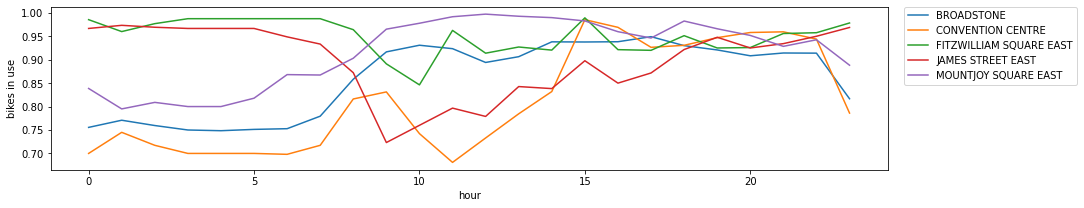

In [19]:
# Assigning the dimension on which the graph length and width will be displayed
plt.rcParams["figure.figsize"] = (15,3)
data=Bikedata_busystations.pivot_table(index=['hour'],columns='name',values='BikeUsuage',aggfunc = 'mean').plot()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("bikes in use")
plt.xlabel("hour")

Text(0.5, 0, 'hour')

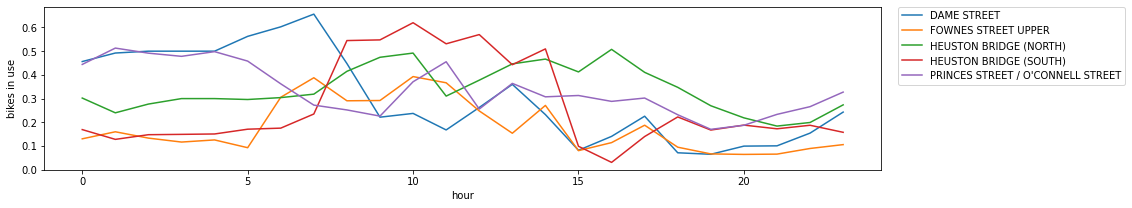

In [20]:
# Assigning the dimension on which the graph length and width will be displayed
plt.rcParams["figure.figsize"] = (15,3)
data=Bikedata_quietstations.pivot_table(index=['hour'],columns='name',values='BikeUsuage',aggfunc = 'mean').plot()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylabel("bikes in use")
plt.xlabel("hour")

## 5. How is the variability in bike usages across time ( on/off Peak time) 

Text(0.5, 0, 'Time of the Day')

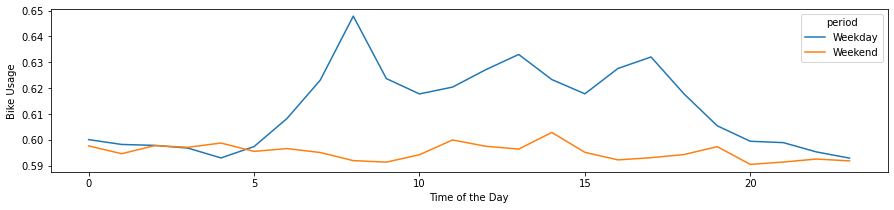

In [23]:
## Comparing bikeusages in weekdays and weekend days 
# Assigning the dimension on which the graph length and width will be displayed
plt.rcParams["figure.figsize"] = (15,3)

#Group by the Day Type and Aggregate
bike_groupby_dayType= Preprocessing_tbl.groupby(['period','hour']).agg(
    {
         'BikeUsuage':'mean' #BikeUsuage across the state using the mean    
    }
)

#Visualizing the trends between weekday and weekend based on hourly setting
bike_dayType_plot = bike_groupby_dayType.pivot_table(index='hour', columns='period', values='BikeUsuage').plot()
plt.ylabel("Bike Usage")
plt.xlabel("Time of the Day")

In [22]:
## Identifying on and off peak by hour
grouped = Preprocessing_tbl.groupby(['hour'])['BikeUsuage'].agg ('mean')
grouped.sort_values(ascending=False)
## The data shows 17 to be onpeak time for bike users
## The data shows 15 to be offpeak(late night and early hours were not considered as bike users are definitely few)

hour
17    0.621626
8     0.617608
12    0.614735
13    0.614439
11    0.613141
18    0.612129
14    0.611706
9     0.611214
10    0.610400
7     0.609215
16    0.607347
19    0.603490
6     0.602483
15    0.599105
0     0.598869
2     0.597810
20    0.597518
3     0.596959
1     0.596775
21    0.596481
5     0.596459
4     0.595782
22    0.594150
23    0.592775
Name: BikeUsuage, dtype: float64

## 5.1 identifying stations by off peak and on peak time     
#### 15=drop off     
#### 17= high peak

In [26]:
## Creation of subdataframes for on and off peak times by stations
bike_offpeak=Preprocessing_tbl[(Preprocessing_tbl.hour==15)].groupby(['name']).agg({'BikeUsuage':'mean'}).sort_values(['BikeUsuage'],ascending=False)
bike_onpeak=Preprocessing_tbl[(Preprocessing_tbl.hour==17)].groupby(['name']).agg({'BikeUsuage':'mean'}).sort_values(['BikeUsuage'],ascending=False)

#merging these two dataframes to compare the stations in on peaks and offpeaks

Bike_on_off_peak = pd.merge(bike_onpeak,bike_offpeak, on='name')
Bike_on_off_peak.reset_index(level=0,inplace=True)

#Renaming the columns
Bike=Bike_on_off_peak.rename(columns={'BikeUsuage_x':'BikeUsuage_onpeak','BikeUsuage_y':'BikeUsuage_offpeak'})
Bike.head()
## 4 stations here were among the top busiest stations on overall bike usages
## Surprisingly,DENMARK STREET GREAT  was not among the busiest stations but they 
## do have more bike users during 17

,name,BikeUsuage_onpeak,BikeUsuage_offpeak
0,BROADSTONE,0.949123,0.937778
1,MOUNTJOY SQUARE EAST,0.946250,0.982692
2,DENMARK STREET GREAT,0.939474,0.963333
3,CONVENTION CENTRE,0.926389,0.985417
4,FITZWILLIAM SQUARE EAST,0.920000,0.989286


In [27]:
Bike.tail()
## 4 stations below were  among the quitest stations only MERRION SQUARE WEST which was not listed in quitest stations
## This implies that each stations has it's own peak and off peak regardless of overal statistics on 
## bike usages

,name,BikeUsuage_onpeak,BikeUsuage_offpeak
108,PRINCES STREET / O'CONNELL STREET,0.302277,0.313043
109,MERRION SQUARE WEST,0.282500,0.265625
110,DAME STREET,0.225694,0.082031
111,FOWNES STREET UPPER,0.187719,0.080392
112,HEUSTON BRIDGE (SOUTH),0.140000,0.098824


## 6. Payment system across stations


In [29]:
payments=Preprocessing_tbl[['name','banking']]
payments.head()

,name,banking
0,SMITHFIELD NORTH,False
1,PARNELL SQUARE NORTH,False
2,CLONMEL STREET,False
3,AVONDALE ROAD,False
4,JAMES STREET EAST,False


In [30]:
payments.groupby('banking')['name'].nunique()
## only 4% of the stations have banking systems installed.

banking
False    108
True       5
Name: name, dtype: int64

## 7. Conclusion

The dublin bike dataset was an interesting project that provided different findings as it reflected the real time data. Different insights that address the outlined project plans have been summarised here below.
Overall, the dataset contains 54749 observations which is summarised into 15 chosen variables.

The findings revealed that there is unequal availability of bike categories in Dublin. It has been found that mechanical bikes are twice available than electrical bikes.This is maybe due to the fact that ebikes are still being integrated on the market compared to mechanical bikes that have been available to use for so long. However, out of 113 stations, only 5 stations which are BROADSTONE, ECCLES STREET EAST, JERVIS STREET,CHARLEVILLE ROAD, MARKET STREET SOUTH have found to have more electrical bikes than the mechanical bikes. 

Other findings from the analysis show that station capacity is independent of the number of bike users served by the stations. In other words, stations with varying capacities have found to have more or fewer bike users.

When the timeframe of bike users was compared, weekdays were found to have a higher proportion of biking operations than weekends. This data suggests that cyclists ride their bikes more on weekdays to get to their destinations, such as their workplaces, schools, gyms, or other daily business activities, because most of these events take place during the week rather than on weekends.

Furthermore, the analysis revealed that different peak levels rose and fell throughout the day. Because the data reflect real-time bike data, cyclists use bikes more between 5 a.m. and 8 p.m., when businesses are open. The results show a significant increase in weekday demands, particularly in the mornings from 5 a.m. until 8PM, with fluctuation during the day and deceleration for the remaining hours of the day, as opposed to weekends, when there was fluctuation with little demand during the day. Also, the findings showed that 5PM as onpeak time while 3PM was found to be offpeak for the captured data. This shows that the majority of bike users prefer to take the bikes when they finish their jobs as there are plenty jobs that finish around or during this time (5PM). 

Another intriguing finding is that there are unequal records for bike usage by station. Some stations recorded a high frequency of usage during the day, while others recorded a smaller trend. For instance stations like (Broadstone, Convention Centre, Fitzwilliam square East, James street East and MountJoy square East) were found to be more busier compared to stations like Heuston bridge North, Princes street, Hueston bridge South, Dame street and Fownes street Upper that recorded lower number of bike usage.This is probably due to the fact of close proximity to which people can access the bikes and the avaliability of bikes present in the stand. 

Surprisingly, it has also been discovered that stations, despite being the busiest and quietest, have different off and on peak times. For example, DENMARK STREET GREAT was not one of the busiest stations, but it was one of the top stations with high bike usage during peak hours (5PM). This is also true for MERRION SQUARE WEST, which was not among the quietest stations but was among those with low off-peak bike usage (3PM).

Finally, the findings revealed that only 4% of the total stations in Dublin have a banking system installed, compared to 96% that do not. This demonstrates that the responsible agency must intervene and make those payment option available to cyclists.
